**Developers' Guide:** [Amazon Machine Learning](https://docs.aws.amazon.com/pdfs/machine-learning/latest/dg/machinelearning-dg.pdf#cross-validation)

# **Census Income dataset -  RF**



[**Random forest**](https://www.ibm.com/topics/random-forest?mhsrc=ibmsearch_a&mhq=decision%20tree%20cart%20algorithm) Random forest is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

#### **Task:**   
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

### **Dataset available on:** [UCI Machine Learning Census Income](https://archive.ics.uci.edu/dataset/20/census+income)   [kaggle](https://www.kaggle.com/datasets/uciml/adult-census-income)

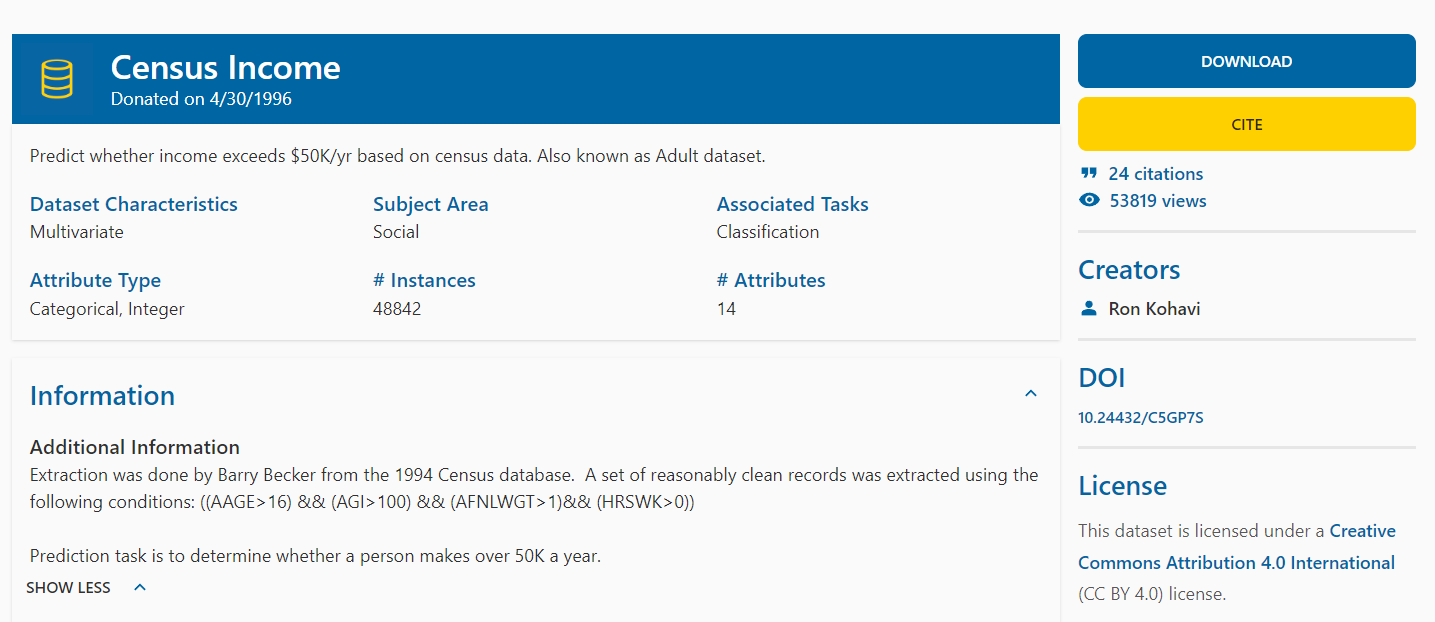

### **Imports**

In [1]:
# import all the necessary library needed
import numpy as np # for scientific computing
import matplotlib.pyplot as plt # for visualisation purposes
import pandas as pd # for wrangling
# the dataset and the classifier algorithm
from sklearn.ensemble import RandomForestClassifier # the randomForestClassifier
from sklearn.model_selection import train_test_split # for splitting the dataset
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # for outputting a summary report of accuracy, precision and recall
# suppress warning messages
import warnings
warnings.filterwarnings("ignore")

### **The dataset**

In [2]:
# read the data using pandas
train_data = pd.read_csv('/content/Census_income_train.csv') # training data

#### **Basic Exploratory data Analysis**

In [3]:
# display the first five rows using the head function
train_data.head(5)

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# shape of the data
train_data.shape

(32560, 15)

In [5]:
# show the column names
print("Training data columns:")
train_data.columns

Training data columns:


Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num',
       'Marital status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country',
       'Income'],
      dtype='object')

In [6]:
# check for missing values
train_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

In [7]:
# check data types
train_data.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-num      int64
Marital status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hours-per-week     int64
Native-country    object
Income            object
dtype: object

#### **Removing rows with unknown values ('?')**

In [8]:
# get all workclass that donot contain the '?' value
clean_train_data = train_data[train_data['Workclass'].str.contains('\?') == False]

In [9]:
# get all Occupation that donot contain the '?' value
clean_train_data2 = clean_train_data[clean_train_data['Occupation'].str.contains('\?') == False]

In [10]:
# get all Native-country that donot contain the '?' value
clean_train_data3 = clean_train_data2[clean_train_data2['Native-country'].str.contains('\?') == False]

In [11]:
# reset index of the dataset
cleaned_train_data = clean_train_data3.reset_index(drop=True)

#### **Convert object datatypes by one-hot-encoding them:**

In [12]:
train_dummies = pd.get_dummies(cleaned_train_data, drop_first = False) #one-hot-encode

In [13]:
train_dummies.head() # head of dummy dataframe

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
# since we a just interested in Income_>50K so we drop Income_<=50K
train_dummies = train_dummies.drop(['Income_ <=50K'], axis=1)

#### **Input and target:**

In [15]:
# separate into input and target
train_input = train_dummies.iloc[:,:-1]
train_target = train_dummies.iloc[:,-1]

#### **Test dataset:**

In [16]:
test_data = pd.read_csv('/content/Census_income_test.csv') # testing data

In [17]:
test_data.head() # head

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [18]:
# shape of the data
test_data.shape

(16281, 15)

In [19]:
# show the column names
print("Test data columns:")
test_data.columns

Test data columns:


Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num',
       'Marital status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country',
       'Income'],
      dtype='object')

In [20]:
# check for missing values
test_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

In [21]:
# check data types
test_data.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-num      int64
Marital status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hours-per-week     int64
Native-country    object
Income            object
dtype: object

#### **Removing rows with unknown values ('?')**

In [22]:
# get all workclass that donot contain the '?' value
clean_test_data = test_data[test_data['Workclass'].str.contains('\?') == False]

In [23]:
# get all Occupation that donot contain the '?' value
clean_test_data2 = clean_test_data[clean_test_data['Occupation'].str.contains('\?') == False]

In [24]:
# get all Native-country that donot contain the '?' value
clean_test_data3 = clean_test_data2[clean_test_data2['Native-country'].str.contains('\?') == False]

In [25]:
# reset index of the dataset
cleaned_test_data = clean_test_data3.reset_index(drop=True)

#### **Convert object datatypes by one-hot-encoding them:**

In [26]:
test_dummies = pd.get_dummies(cleaned_test_data, drop_first = False) #one-hot-encode

In [27]:
test_dummies.head() # head of dummy dataframe

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K.,Income_ >50K.
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [28]:
# since we a just interested in Income_>50K so we drop Income_<=50K
test_dummies = test_dummies.drop(['Income_ <=50K.'], axis=1)

#### **Input and target:**

In [29]:
# separate into input and target
test_input = test_dummies.iloc[:,:-1]
test_target = test_dummies.iloc[:,-1]

### **Creating the model:**

In [34]:
# instantiate the classifier
rf_model = RandomForestClassifier(random_state=365, n_estimators=150, ccp_alpha = 0.0001) # feel free to tune the parameters

In [35]:
%%time
# traing the model by fitting the data
rf_model.fit(train_input, train_target)

CPU times: user 17.1 s, sys: 38.4 ms, total: 17.2 s
Wall time: 17.4 s


RandomForestClassifier(ccp_alpha=0.0001, n_estimators=150, random_state=365)

In [36]:
# try to predict using the trained model
test_pred = rf_model.predict(test_input)

#### **Test the performance of our model:**

#### **Confusion Matrix summary of the model:**

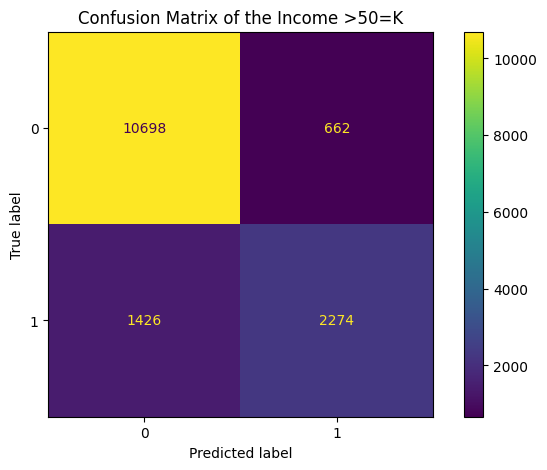

In [38]:
# display the confusionMatrix
import seaborn as sns
sns.reset_orig() # to remove the seaborn visual

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(test_target, test_pred),
)

cmp.plot(ax=ax)
plt.title("Confusion Matrix of the Income >50=K");

In [39]:
# print a summary report of the precision, recall, f1-score, support
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11360
           1       0.77      0.61      0.69      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.78      0.80     15060
weighted avg       0.86      0.86      0.86     15060

